In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from matplotlib import pyplot as plt
import numpy as np

import camb
from camb import model, initialpower
import pandas as pd

from cassL import camb_interface as ci
from cassL import user_interface as ui

In [2]:
import importlib.util
import sys

spec = importlib.util.spec_from_file_location(
    "andreap", "../emulator/andreap.py")
andreap = importlib.util.module_from_spec(spec)
sys.modules["andreap"] = andreap
spec.loader.exec_module(andreap)

In [3]:
omega_index = 3 # while we debug, we confine our attention to just one value
omnuh2_float = ci.OMNUH2_FLOATS[omega_index]
omnuh2_str = ci.OMNUH2_STRS[omega_index]

In [4]:
# Axe the 0.01 value since Ariel has not tested that one in the shared results
powernu3 = ci.load_benchmark(
    "power_nu3/Aletheia_powernu3_zorig_nu",
    ["0.0006", "0.0021", "0.0064", "0.0100"] 
)

In [5]:
modeli = 1
true_early = powernu3[omnuh2_str][modeli][0]
true_late = powernu3[omnuh2_str][modeli][4]
# The following construction is purely for convenience; it makes indexing a
# little easier later.
true = [true_early, None, None, None, true_late]

In [6]:
# Get the two cosmologies that we'll use to compare the various codes
model = ci.balance_neutrinos_with_CDM(
    ci.cosm.iloc[modeli], omnuh2_float)
MEMNeC = ci.balance_neutrinos_with_CDM(model, 0)

In [7]:
# from cassL import generate_emu_data as ged
# ged.print_cosmology(model)

In [8]:
# We need a model 0 interpolator with omega_nu = 0.002
p_interpolator = ci.cosmology_to_PK_interpolator(
    model, redshifts=np.flip(np.linspace(0, 3, 150)),
    fancy_neutrinos=False, kmax=10, hubble_units=False)
p_MEMNeC_interpolator = ci.cosmology_to_PK_interpolator(
    MEMNeC, redshifts=np.flip(np.linspace(0, 3, 150)),
    fancy_neutrinos=False, kmax=10, hubble_units=False)

In [9]:
andrea_interpolator = andreap.cassL_to_andrea_cosmology(
    model, hybrid=True, foreign=[False, False, False])

ombh2 0.022445
omch2 0.110567
n_s 0.96
A_s 1.78568440085517e-09
OmK 0.0
OmL 0.527231736
h 0.55
w0 -1.0
wa 0.00
omnuh2 0.01
mnu 0.930032999101478


In [10]:
print(ci.parse_redshifts(modeli))

[1.76098  0.859383 0.480044 0.247707 0.      ]


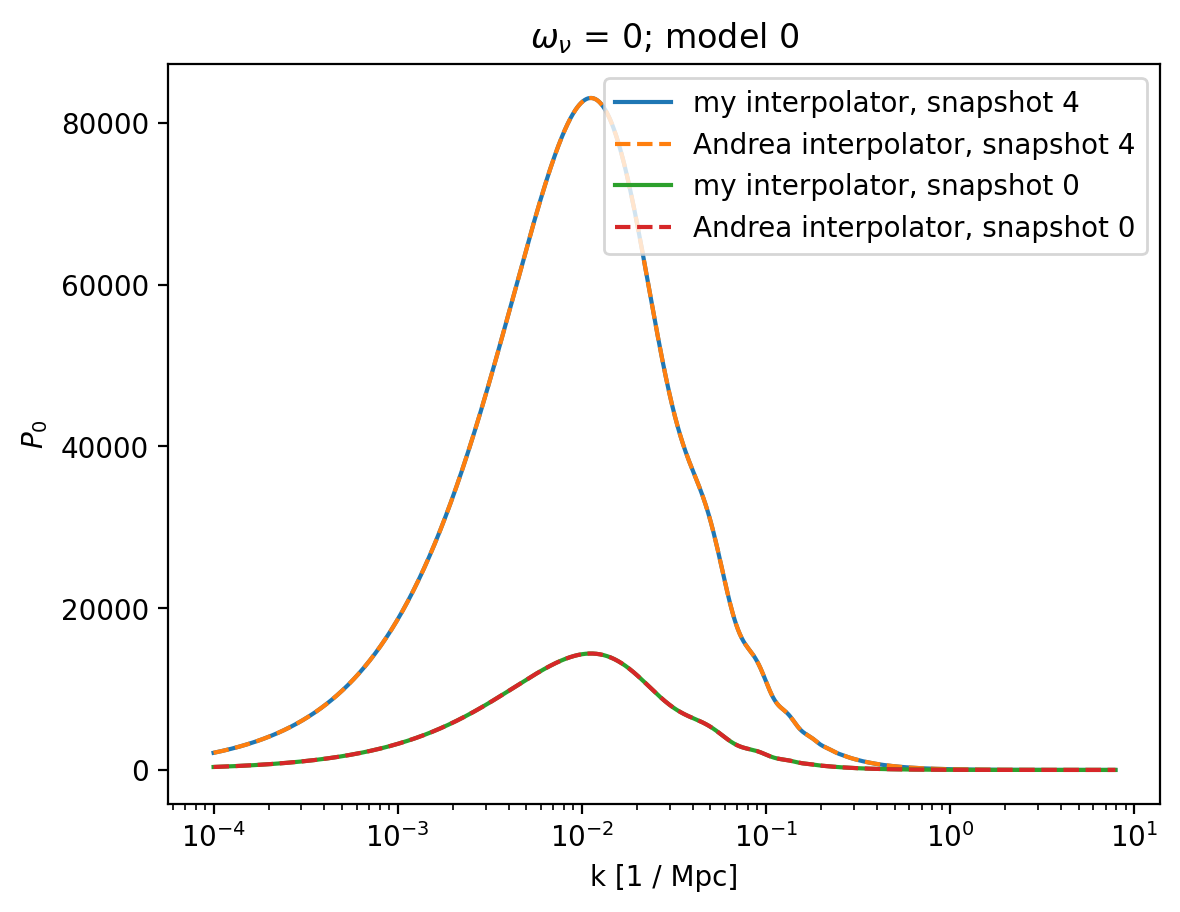

In [11]:
z_list = ci.parse_redshifts(modeli)

j = 4 # SNAP index
z = z_list[j]

#plt.plot(true[j]["k"], true[j]["P_no"],
#         label="powernu3.tar snapshot 4")
my_MEMNeC_Pk = p_MEMNeC_interpolator.P(z, true[j]["k"])
plt.plot(true[j]["k"], my_MEMNeC_Pk,
         label="my interpolator, snapshot 4")

andrea_MEMNeC_Pk = andrea_interpolator['mzero'].P(z, true[j]["k"])
plt.plot(true[j]["k"], andrea_MEMNeC_Pk,
         label="Andrea interpolator, snapshot 4",
        linestyle='dashed')

j = 0
z = z_list[j]
#plt.plot(true[j]["k"], true[j]["P_no"],
#         label="powernu3.tar snapshot 0")
my_MEMNeC_Pk = p_MEMNeC_interpolator.P(z, true[j]["k"])
plt.plot(true[j]["k"], my_MEMNeC_Pk,
         label="my interpolator, snapshot 0")

andrea_MEMNeC_Pk = andrea_interpolator['mzero'].P(z, true[j]["k"])
#andrea_MEMNeC_Pk = andrea_impostor.P(z, true[j]["k"])
plt.plot(true[j]["k"], andrea_MEMNeC_Pk,
         label="Andrea interpolator, snapshot 0",
        linestyle='dashed')

plt.xscale('log')
plt.xlabel(r"k [1 / Mpc]")
plt.ylabel(r"$P_0$")
plt.title(r"$\omega_\nu$ = 0; model 0")
plt.legend()

# This protects other cells by avoiding unintended reuse
del j, z_list
plt.savefig("../plots/camb_debug/interpolator_discrepancy.png")

In [12]:
def ui.percent_error(trusted, tested):
    return 100 * (tested - trusted) / trusted

z_list = ci.parse_redshifts(modeli)

j = 4 # SNAP index
z = z_list[j]

my_MEMNeC_Pk = p_MEMNeC_interpolator.P(z, true[j]["k"])
andrea_MEMNeC_Pk = andrea_interpolator['mzero'].P(z, true[j]["k"])

plt.plot(true[j]["k"],
         ui.percent_error(true[j]["P_no"], my_MEMNeC_Pk),
         label="snapshot 4")
j = 0
z = z_list[j]
my_MEMNeC_Pk = p_MEMNeC_interpolator.P(z, true[j]["k"])
andrea_MEMNeC_Pk = andrea_interpolator['mzero'].P(z, true[j]["k"])

plt.plot(true[j]["k"],
         ui.percent_error(true[j]["P_no"], my_MEMNeC_Pk),
         label="snapshot 0")
plt.xscale('log')
plt.xlabel(r"k [1 / Mpc]")
plt.ylabel(r"Percent Error")
plt.title(r"$\omega_\nu$ = 0; model " + str(modeli) + 
         "\nError between Lukas and Ariel: " + r"$P_0$")
plt.legend()

# This protects other cells by avoiding unintended reuse
del j, z_list

SyntaxError: invalid syntax (1648700222.py, line 1)

In [ ]:
def ui.percent_error(trusted, tested):
    return 100 * (tested - trusted) / trusted

z_list = ci.parse_redshifts(modeli)

j = 4 # SNAP index
z = z_list[j]

my_MEMNeC_Pk = p_MEMNeC_interpolator.P(z, true[j]["k"])
andrea_MEMNeC_Pk = andrea_interpolator['mzero'].P(z, true[j]["k"])
plt.plot(true[j]["k"],
         ui.percent_error(andrea_MEMNeC_Pk, my_MEMNeC_Pk),
         label="snapshot 4")
j = 0
z = z_list[j]
my_MEMNeC_Pk = p_MEMNeC_interpolator.P(z, true[j]["k"])
andrea_MEMNeC_Pk = andrea_interpolator['mzero'].P(z, true[j]["k"])
plt.plot(true[j]["k"],
         ui.percent_error(andrea_MEMNeC_Pk, my_MEMNeC_Pk),
         label="snapshot 0")
plt.xscale('log')
plt.xlabel(r"k [1 / Mpc]")
plt.ylabel(r"Percent Error")
plt.title(r"$\omega_\nu$ = 0; model " + str(modeli) + 
         "\nError between Lukas and Andrea: " + r"$P_0$")
plt.legend()

# This protects other cells by avoiding unintended reuse
del j, z_list

In [ ]:
def ui.percent_error(trusted, tested):
    return 100 * (tested - trusted) / trusted

z_list = ci.parse_redshifts(modeli)

j = 4 # SNAP index
z = z_list[j]

my_Pk = p_interpolator.P(z, true[j]["k"])
andrea_Pk = andrea_interpolator['mnu'].P(z, true[j]["k"])

plt.plot(true[j]["k"],
         ui.percent_error(true[j]["P_nu"], my_Pk),
         label="snapshot 4")
j = 0
z = z_list[j]
my_Pk = p_interpolator.P(z, true[j]["k"])
andrea_Pk = andrea_interpolator['mnu'].P(z, true[j]["k"])

plt.plot(true[j]["k"],
         ui.percent_error(true[j]["P_nu"], my_Pk),
         label="snapshot 0")
plt.xscale('log')
plt.xlabel(r"k [1 / Mpc]")
plt.ylabel(r"Percent Error")
plt.title(r"$\omega_\nu$ = " + omnuh2_str + "; model " + str(modeli) +  
         "\nError between Lukas and Ariel: " + r"$P_\nu$")
plt.legend()

# This protects other cells by avoiding unintended reuse
del j, z_list

In [ ]:
def ui.percent_error(trusted, tested):
    return 100 * (tested - trusted) / trusted

z_list = ci.parse_redshifts(modeli)

j = 4 # SNAP index
z = z_list[j]

my_Pk = p_interpolator.P(z, true[j]["k"])
andrea_Pk = andrea_interpolator['mnu'].P(z, true[j]["k"])

plt.plot(true[j]["k"],
         ui.percent_error(andrea_Pk, my_Pk),
         label="snapshot 4")
j = 0
z = z_list[j]
my_Pk = p_interpolator.P(z, true[j]["k"])
andrea_Pk = andrea_interpolator['mnu'].P(z, true[j]["k"])

plt.plot(true[j]["k"],
         ui.percent_error(andrea_Pk, my_Pk),
         label="snapshot 0")
plt.xscale('log')
plt.xlabel(r"k [1 / Mpc]")
plt.ylabel(r"Percent Error")
plt.title(r"$\omega_\nu$ = " + omnuh2_str + "; model " + str(modeli) + 
         "\nError between Lukas and Andrea:" + r" $P_\nu$")
plt.legend()

# This protects other cells by avoiding unintended reuse
del j, z_list

In [ ]:
def ui.percent_error(trusted, tested):
    return 100 * (tested - trusted) / trusted

z_list = ci.parse_redshifts(modeli)

j = 4 # SNAP index
z = z_list[j]

my_Pk = p_interpolator.P(z, true[j]["k"])
my_MEMNeC_Pk = p_MEMNeC_interpolator.P(z, true[j]["k"])
my_rat = my_Pk / my_MEMNeC_Pk

plt.plot(true[j]["k"],
         ui.percent_error(true[j]["ratio"], my_rat),
         label="snapshot 4")
j = 0
z = z_list[j]
my_Pk = p_interpolator.P(z, true[j]["k"])
my_MEMNeC_Pk = p_MEMNeC_interpolator.P(z, true[j]["k"])
my_rat = my_Pk / my_MEMNeC_Pk

plt.plot(true[j]["k"],
         ui.percent_error(true[j]["ratio"], my_rat),
         label="snapshot 0")
plt.xscale('log')
plt.xlabel(r"k [1 / Mpc]")
plt.ylabel(r"Percent Error on Ratio")
plt.title(r"$\omega_\nu$ = " + omnuh2_str + "; model " + str(modeli) + 
         "\nError between Lukas and Ariel: x")
plt.legend()

# This protects other cells by avoiding unintended reuse
del j, z_list

In [ ]:
def ui.percent_error(trusted, tested):
    return 100 * (tested - trusted) / trusted

z_list = ci.parse_redshifts(modeli)

j = 4 # SNAP index
z = z_list[j]

my_Pk = p_interpolator.P(z, true[j]["k"])
my_MEMNeC_Pk = p_MEMNeC_interpolator.P(z, true[j]["k"])
my_rat = my_Pk / my_MEMNeC_Pk
andrea_Pk = andrea_interpolator['mnu'].P(z, true[j]["k"])
andrea_MEMNeC_Pk = andrea_interpolator['mzero'].P(z, true[j]["k"])
andrea_rat = andrea_Pk / andrea_MEMNeC_Pk

plt.plot(true[j]["k"],
         ui.percent_error(andrea_rat, my_rat),
         label="snapshot 4")
j = 0
z = z_list[j]
my_Pk = p_interpolator.P(z, true[j]["k"])
my_MEMNeC_Pk = p_MEMNeC_interpolator.P(z, true[j]["k"])
my_rat = my_Pk / my_MEMNeC_Pk
andrea_Pk = andrea_interpolator['mnu'].P(z, true[j]["k"])
andrea_MEMNeC_Pk = andrea_interpolator['mzero'].P(z, true[j]["k"])
andrea_rat = andrea_Pk / andrea_MEMNeC_Pk

plt.plot(true[j]["k"],
         ui.percent_error(andrea_rat, my_rat),
         label="snapshot 0")
plt.xscale('log')
plt.xlabel(r"k [1 / Mpc]")
plt.ylabel(r"Percent Error on Ratio")
plt.title(r"$\omega_\nu$ = " + omnuh2_str + "; model " + str(modeli) + 
         "\nError between Lukas and Ariel: x")
plt.legend()

# This protects other cells by avoiding unintended reuse
del j, z_list

In [ ]:
z_list = ci.parse_redshifts(modeli)

j = 4 # SNAP index
z = z_list[j]

andrea_Pk = andrea_interpolator['mnu'].P(z, true[j]["k"])
andrea_MEMNeC_Pk = andrea_interpolator['mzero'].P(z, true[j]["k"])
andrea_rat = andrea_Pk / andrea_MEMNeC_Pk

plt.plot(true[j]["k"],
         ui.percent_error(true[j]["ratio"], andrea_rat),
         label="snapshot 4")
j = 0
z = z_list[j]
andrea_Pk = andrea_interpolator['mnu'].P(z, true[j]["k"])
andrea_MEMNeC_Pk = andrea_interpolator['mzero'].P(z, true[j]["k"])
andrea_rat = andrea_Pk / andrea_MEMNeC_Pk

plt.plot(true[j]["k"],
         ui.percent_error(true[j]["ratio"], andrea_rat),
         label="snapshot 0")
plt.xscale('log')
plt.xlabel(r"k [1 / Mpc]")
plt.ylabel(r"Percent Error on Ratio")
plt.title(r"$\omega_\nu$ = " + omnuh2_str + "; model " + str(modeli) + 
         "\nError between Ariel and Andrea: x")
plt.legend()

# This protects other cells by avoiding unintended reuse
del j, z_list